# Exploratory Data Analysis Ballots Data

# Table of Contents

* [Load Modules](#setup)
* [Load Data](#loaddata)
* [Exploratory Data Analysis](#eda)
 * [Rejected Absentee/Mail-in Ballots](#ballotsstatus)
 * [Rejected Absentee/Mail-in Ballots Rates by County](#ballotrejectioncounty)
 * [County vs Median Earnings](#earningscounty)
 * [Rejected Absentee/Mail-in Ballots vs Median Earnings](#rejectionearnings)
 * [County vs Rejected Absentee/Mail-in Ballots vs Speaking English Population](#rejectioncountyenglish)
 * [Rejected Absentee/Mail-in Ballots vs Language Spoken at Home](#rejectionenglish)
 * [Percentage of Population Speaks English Very Well vs Rejected Absentee/Mail-in Ballots Rate](#englishverywell)
 * [English Speaking Population vs Median Earnings](#earningslanguage)
 * [Rejected Absentee/Mail-in Ballots Reasons](#reasons)
 * [Ballot Rejection Reason vs Demographic Data](#reasonvsdemographic)
   * [Ballot Rejection Reason: Signature Does Not Match](#signaturedoesnotmatch)

<hr>

## Load Modules<a class="anchor" id="setup"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
from scipy.stats import chi2_contingency

mpl.rcParams['font.size'] = 16.0
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

<hr>

## Load Data<a  class="anchor" id="loaddata"></a>

In [2]:
merged_df = pd.read_csv('../Khamanna/merged_df2.csv')

<hr>

## Exploratory Data Analysis<a class="anchor" id="eda"></a>

### Rejected Absentee/Mail-in Ballots<a class="anchor" id="ballotsstatus"></a>

2016 Rejected Ballots-Source: <strong>“Rejected Absentee/Mail-in Ballots in the 2016 and 2018 Elections.”</strong> [Ballotpedia](https://ballotpedia.org/Rejected_absentee/mail-in_ballots_in_the_2016_and_2018_elections).<br>
Rejected Absentee/Mail-in Ballots: <strong>9,957</strong><br>
All Absentee/Mail-in Ballots Returned: <strong>355,457</strong><br>
Rejected Absentee/Mail-in Ballots  as a Percentage of All Absentee/Mail-in Ballots Returned: <strong>2.8%</strong><br>
Total turnout: <strong>3,957,303</strong><br>

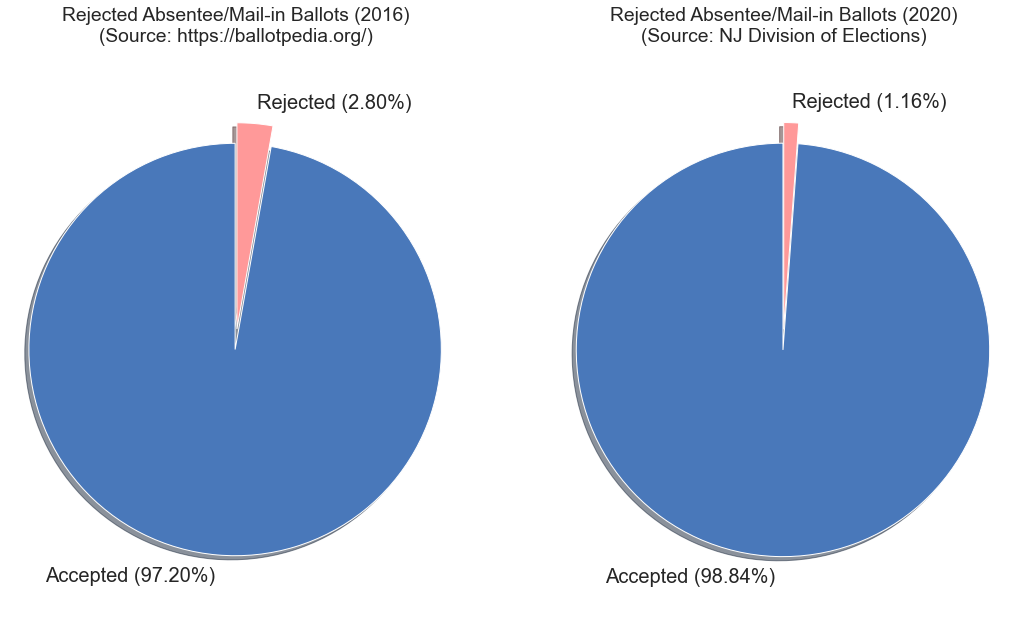

In [25]:
# Plot Rejected Absentee/Mail-in Ballots
sns.set_style("darkgrid")
labels1 = ['Accepted (98.84%)', 'Rejected (1.16%)']
labels2 = ['Accepted (97.20%)', 'Rejected (2.80%)']
sizes = [(1 - (merged_df['County ballots_rejected'].sum() / merged_df['County ballots_cast'].sum())) * 100,
         (merged_df['County ballots_rejected'].sum() / merged_df['County ballots_cast'].sum()) * 100]
sizes2 = [100 - 2.8, 2.8]
explode = (0.05, 0.05)
colors = ['#4978ba','#ff9999']

fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(18,10))
ax2.pie(sizes,
        explode=explode,
        labels=labels1,
        autopct='',#'%1.2f%%',
        textprops={'fontsize': 20},
        shadow=True,
        startangle=90,
        colors=colors)
ax1.pie(sizes2,
        explode=explode,
        labels=labels2,
        autopct='',
        textprops={'fontsize': 20},
        shadow=True,
        startangle=90,
        colors=colors)
ax2.set(title="Rejected Absentee/Mail-in Ballots (2020)\n(Source: NJ Division of Elections)\n")
ax1.set(title="Rejected Absentee/Mail-in Ballots (2016)\n(Source: https://ballotpedia.org/)\n")
ax2.axis('equal')
ax1.axis('equal')
# plt.text(x=-2, y=1, s="loco")
plt.show()

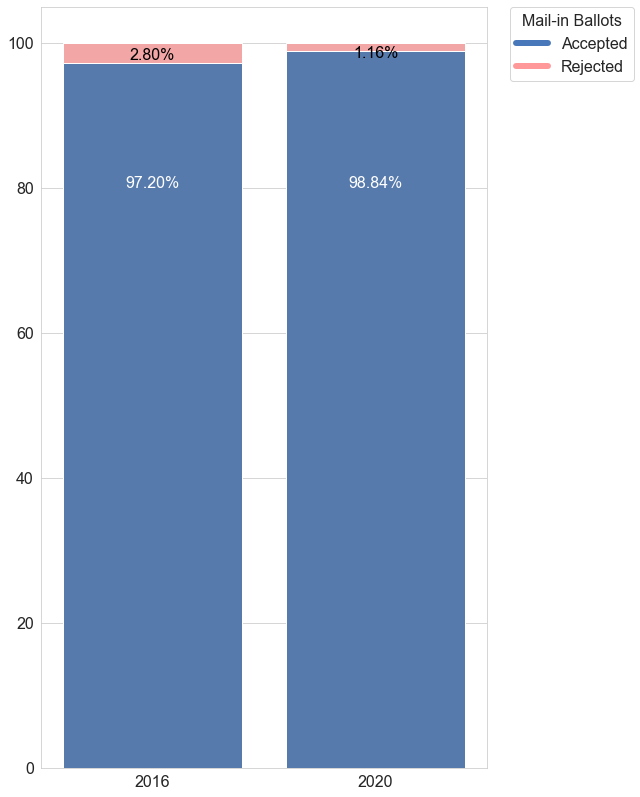

In [355]:
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='#4978ba', lw=6, label='Accepted'),
                   Line2D([0], [0], color='#ff9999', lw=6, label='Rejected')]

fig, ax = plt.subplots(figsize=(8,14))
g=sns.barplot(x=['2020','2016'], y=[100,100], color='#ff9999', ax=ax)
sns.barplot(x=['2020','2016'], y=[sizes[0],sizes2[0]], color='#4978ba', ax=ax)

ax.legend(handles=legend_elements,
          title="Mail-in Ballots",
          bbox_to_anchor=(1.05, 1),
          loc=2,
          borderaxespad=0.)

g.text(1,80, "{:.2f}%".format(sizes[0]), color='white', ha="center")
g.text(0,80, "{:.2f}%".format(sizes2[0]), color='white', ha="center")

g.text(1,98, "{:.2f}%".format(sizes[1]), color='black', ha="center")
g.text(0,97.7, "{:.2f}%".format(sizes2[1]), color='black', ha="center")

plt.show()

### Rejected Absentee/Mail-in Ballots Rates by County<a class="anchor" id="ballotrejectioncounty"></a>

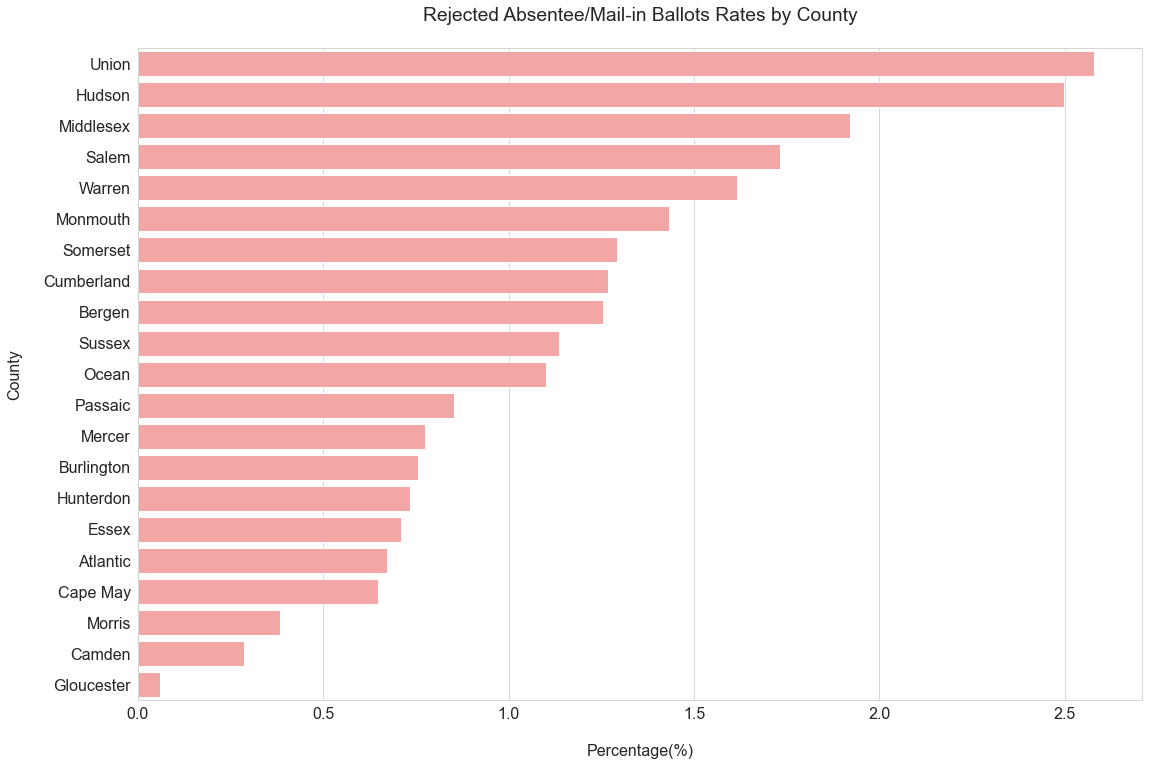

In [35]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,12))
ax = sns.barplot(x='County percent_rejected',
            y='county',
            data=merged_df.sort_values(by='County percent_rejected', ascending=False),
            color='#ff9999',
            errcolor="black",
            ci=95)
plot_var = ax.set(xlabel='\nPercentage(%)',
                  ylabel='County\n',
                  title="Rejected Absentee/Mail-in Ballots Rates by County\n")

### County vs Median Earnings<a class="anchor" id="earningscounty"></a>

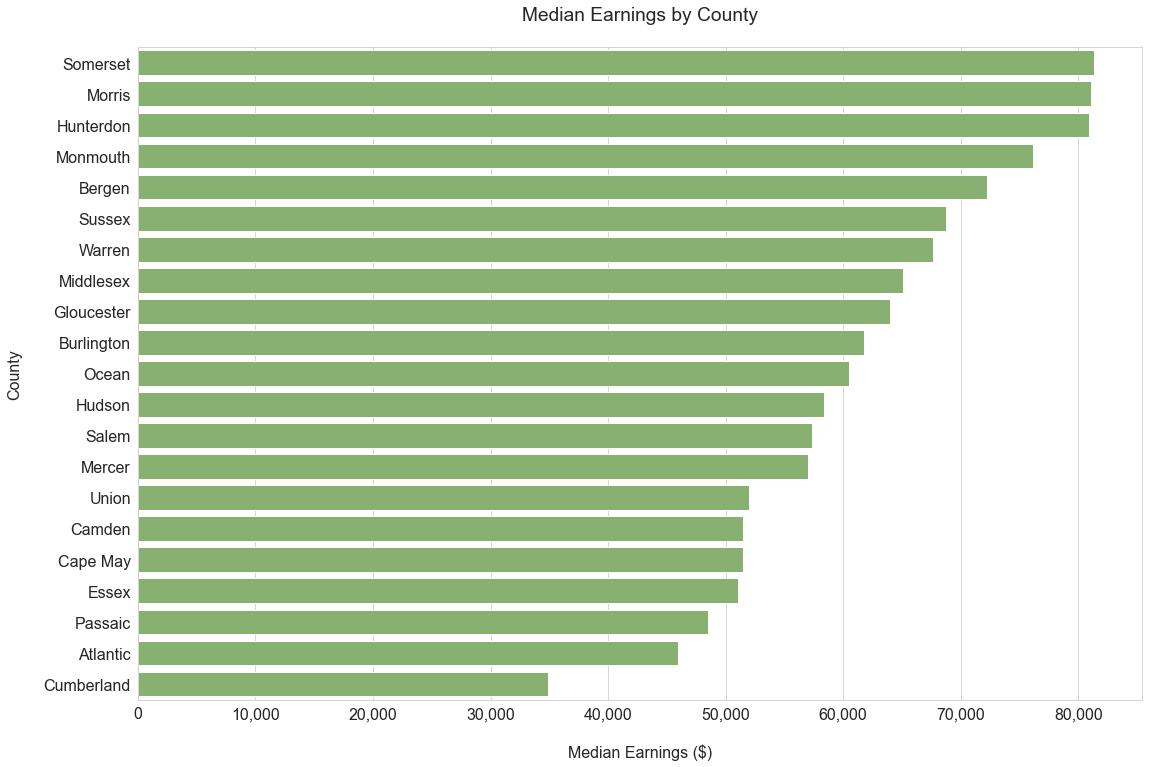

In [285]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,12))
sns.barplot(x='County median_earnings',
            y='county',
            data=merged_df.sort_values(by='County median_earnings', axis=0, ascending=False),
            color="#85bb65",
            ax = ax)

xlabels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)

plot_var = ax.set(xlabel='\nMedian Earnings ($)',
                  ylabel='County\n',
                  title="Median Earnings by County\n")


### Rejected Absentee/Mail-in Ballots vs Median Earnings<a class="anchor" id="rejectionearnings"></a>

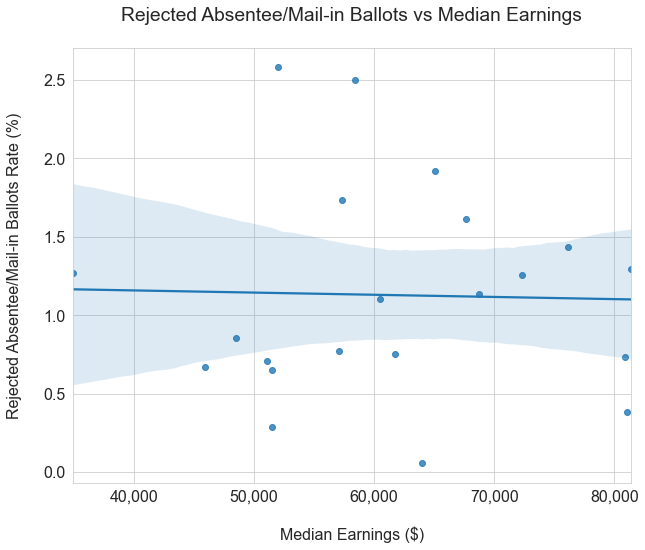

In [246]:
fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x='County median_earnings',
           y='County percent_rejected',
           data=merged_df,
           ax=ax)
ax.set(xlabel='\nMedian Earnings ($)',
       ylabel='Rejected Absentee/Mail-in Ballots Rate (%)\n',
       title="Rejected Absentee/Mail-in Ballots vs Median Earnings\n")

ax.set_xticklabels(['{:,.0f}'.format(x) for x in ax.get_xticks()])

plt.show()

### County vs Rejected Absentee/Mail-in Ballots vs Speaking English Population<a class="anchor" id="rejectioncountyenglish"></a>

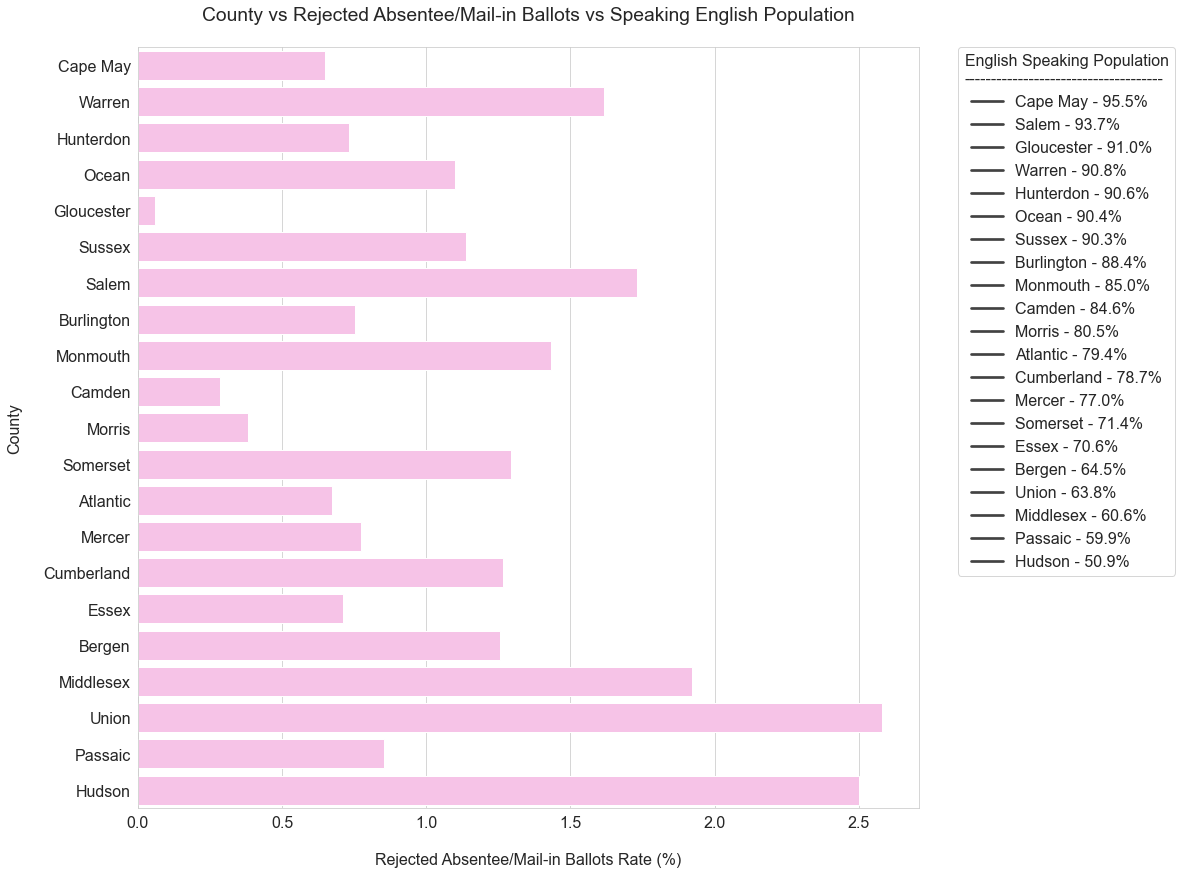

In [275]:
fig, ax = plt.subplots(figsize=(14,14))
sns.barplot(x='County percent_rejected',
            y='county',
            data=merged_df.sort_values(by='County percent_english_very_well', axis=0, ascending=False),
            color="#ffbaea"
           )

ax.set(xlabel='\nRejected Absentee/Mail-in Ballots Rate (%)',
                        ylabel='County\n',
                        title="County vs Rejected Absentee/Mail-in Ballots vs Speaking English Population\n")

ax.legend(labels=list(df.sort_values(by='percent_english', ascending=False)['County']+' - '+\
                      df.sort_values(by='percent_english',ascending=False)['percent_english'].astype('str')+'%'),
          title="English Speaking Population\n-------------------------------------",
          bbox_to_anchor=(1.05, 1),
          loc=2,
          borderaxespad=0.)
plt.show()

### Rejected Absentee/Mail-in Ballots vs Language Spoken at Home<a class="anchor" id="rejectionenglish"></a>

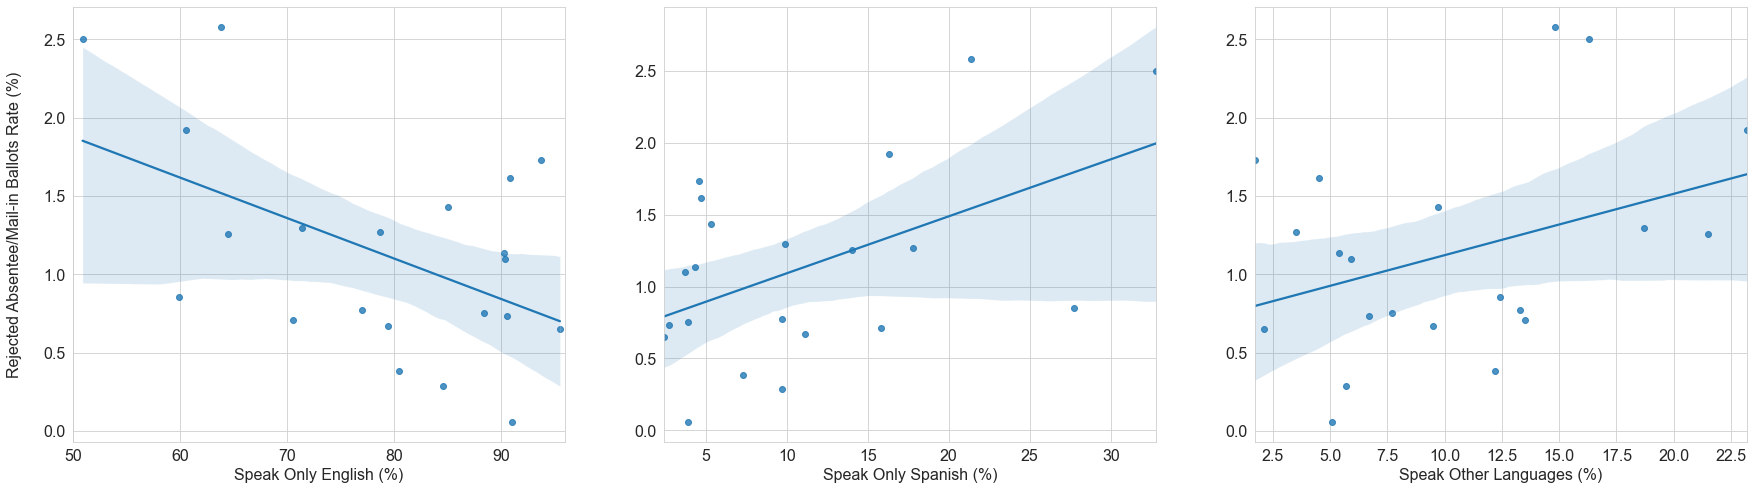

In [230]:
fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize=(30,8))

sns.regplot(x='County percent_english',
            y='County percent_rejected',
            data=merged_df,
            ax=ax)
sns.regplot(x='County percent_spanish',
            y='County percent_rejected',
            data=merged_df,
            ax=ax1)
sns.regplot(x='County percent_other',
            y='County percent_rejected',
            data=merged_df,
            ax=ax2)
sns.lmplot

ax.set(xlabel='Speak Only English (%)',
       ylabel='Rejected Absentee/Mail-in Ballots Rate (%)\n',
       xlim=(50,96))
ax1.set(xlabel='Speak Only Spanish (%)',
       ylabel='')
ax2.set(xlabel='Speak Other Languages (%)',
       ylabel='')

plt.show()

### Percentage of Population Speaks English Very Well vs Rejected Absentee/Mail-in Ballots Rate<a class="anchor" id="englishverywell"></a>

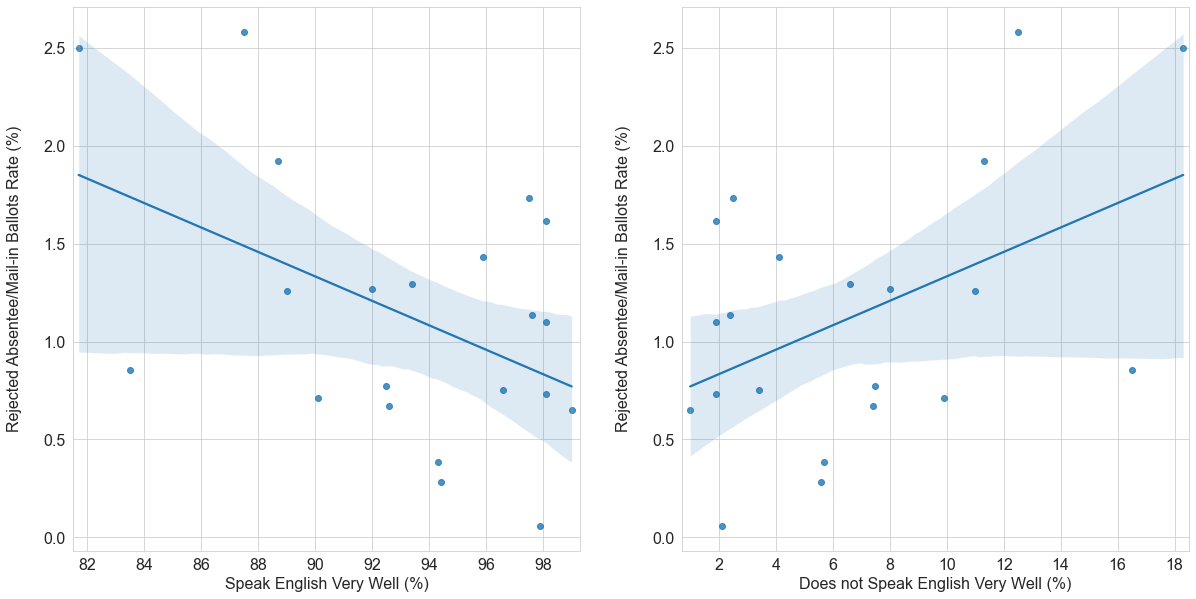

In [217]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(20,10))

sns.regplot(x='County percent_english_very_well',
            y='County percent_rejected',
            data=merged_df,
            ax=ax)
sns.regplot(x='County percent_english_not_very_well',
            y='County percent_rejected',
            data=merged_df,
            ax=ax1)

ax.set(xlabel='Speak English Very Well (%)',
       ylabel='Rejected Absentee/Mail-in Ballots Rate (%)\n',
       xlim=(81.5,99.3))
ax1.set(xlabel='Does not Speak English Very Well (%)',
       ylabel='Rejected Absentee/Mail-in Ballots Rate (%)\n',
       xlim=(0.7,18.5))

plt.show()

### Population Speaks English Very Well vs Median Earnings<a class="anchor" id="earningslanguage"></a>

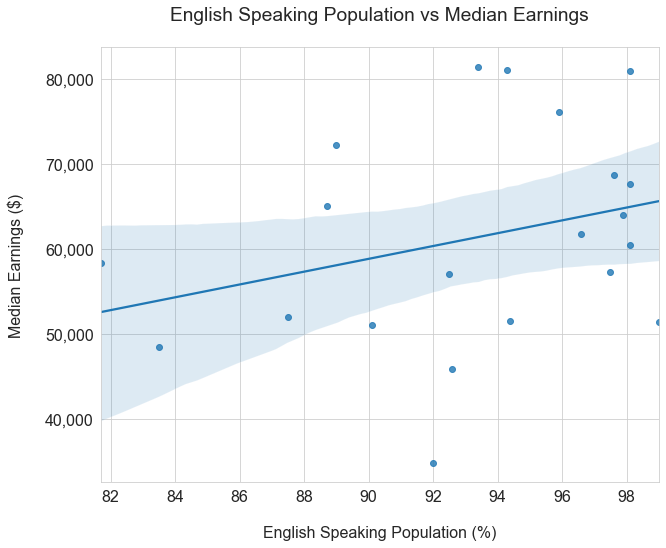

In [247]:
fig, ax = plt.subplots(figsize=(10,8))

sns.regplot(x='County percent_english_very_well',
            y='County median_earnings',
            data=merged_df,
            ax=ax)
ax.set(xlabel='\nEnglish Speaking Population (%)',
       ylabel='Median Earnings ($)\n',
       title="English Speaking Population vs Median Earnings\n")

ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])

plt.show()

### Rejected Absentee/Mail-in Ballots Reasons<a class="anchor" id="reasons"></a>

In [241]:
df_temp = pd.melt(merged_df,
        id_vars=['county'],
        value_vars=['Ballot Received After Deadline(%)', 'Certificate Missing(%)', 'Certificate Not Signed(%)', 
                    'Grouped together(%)', 'Other Reasons(%)','Signature Does Not Match(%)'])

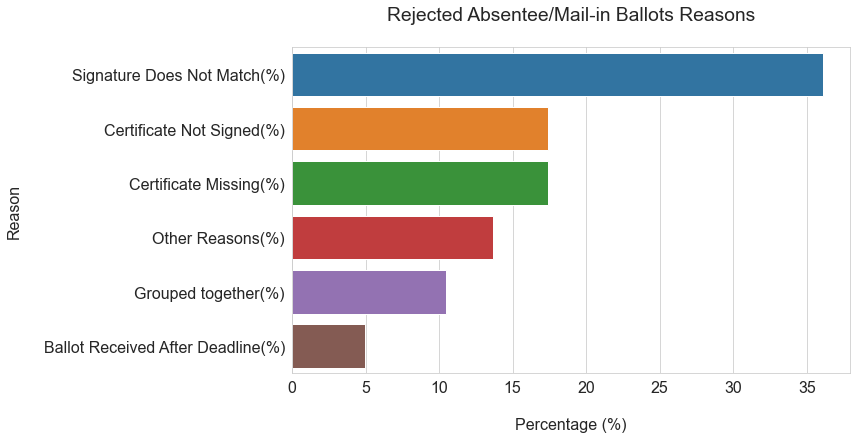

In [245]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='value',
            y='variable',
            data=(df_temp.groupby('variable').agg({"value":"sum"}) / df_temp['value'].sum() * 100).sort_values(by='value', ascending=False).reset_index()
           )

ax.set(xlabel='\nPercentage (%)',
                        ylabel='Reason\n',
                        title="Rejected Absentee/Mail-in Ballots Reasons\n")

plt.show()

### Ballot Rejection Reason vs Demographic Data<a class="anchor" id="reasonvsdemographic"></a>

### Ballot Rejection Reason: Signature Does Not Match<a class="anchor" id="signaturedoesnotmatch"></a>

In [155]:
race_columns = ['County Percent Hispanic or Latino', 'County Percent White', 'County Percent Black or African American',
'County Percent American Indian and Alaska Native', 'County Percent Asian',
'County Percent Native Hawaiian and Other Pacific Islander', 'County Percent Other Race',
'County Percent Two or more races']
language_columns = ['County percent_english', 'County percent_spanish', 'County percent_other',
                    'County percent_english_very_well', 'County percent_english_not_very_well']
education_columns = ['County %HS_and_less', 'County more_than_HS%']

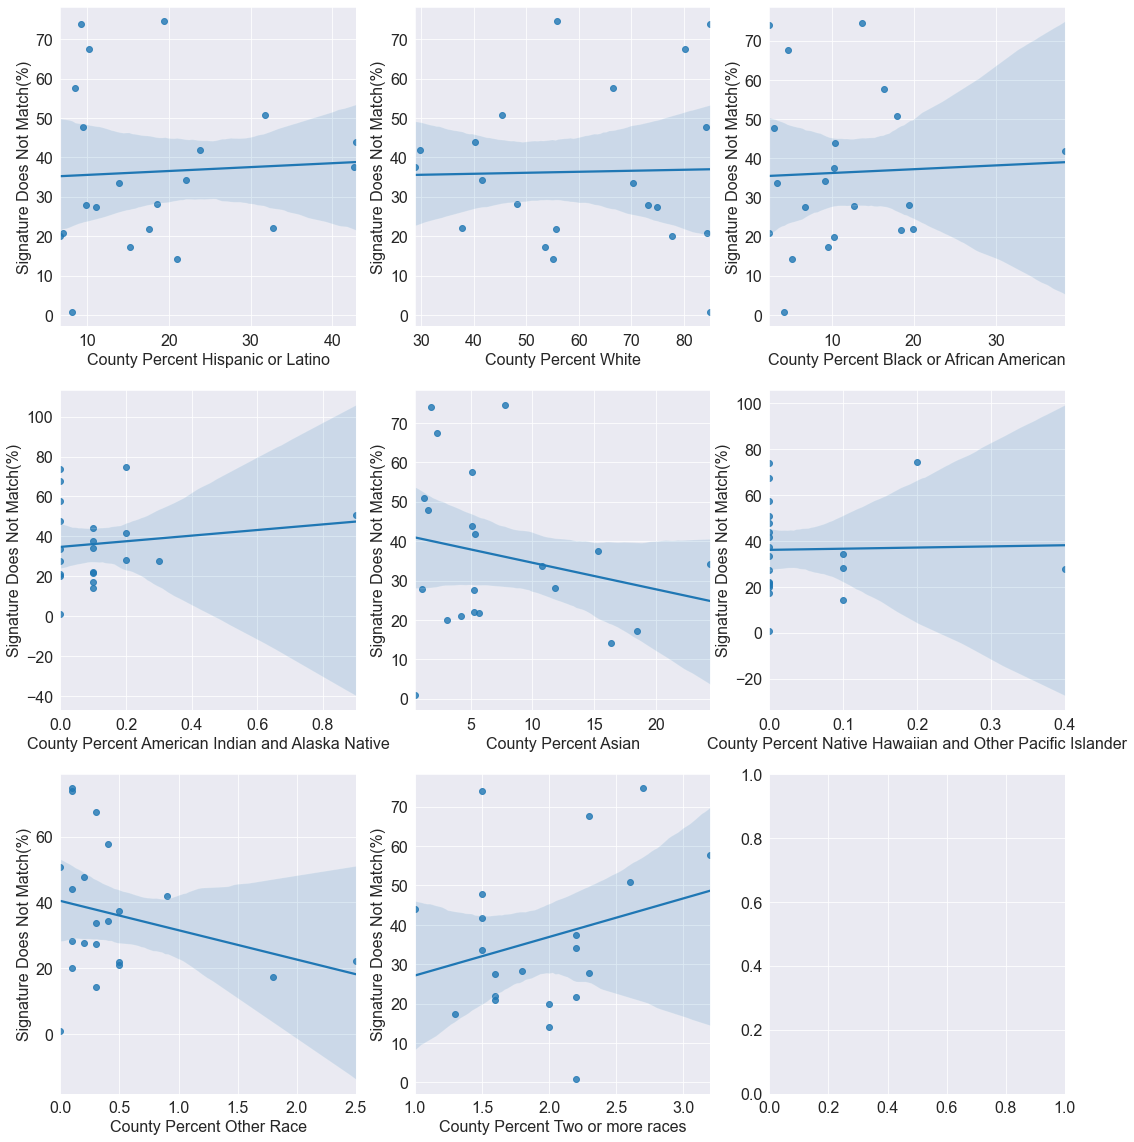

In [187]:
n_cols = 3

fig, axs = plt.subplots(math.ceil(len(race_columns)/n_cols),n_cols,figsize=(18,20))

for i in range(0,len(race_columns),n_cols):
    w = int(i / n_cols)
    for j, feature in enumerate(race_columns[i:i+n_cols]):
        sns.regplot(x=feature, y='Signature Does Not Match(%)', data=merged_df, ax = axs[w,j])

plt.show()

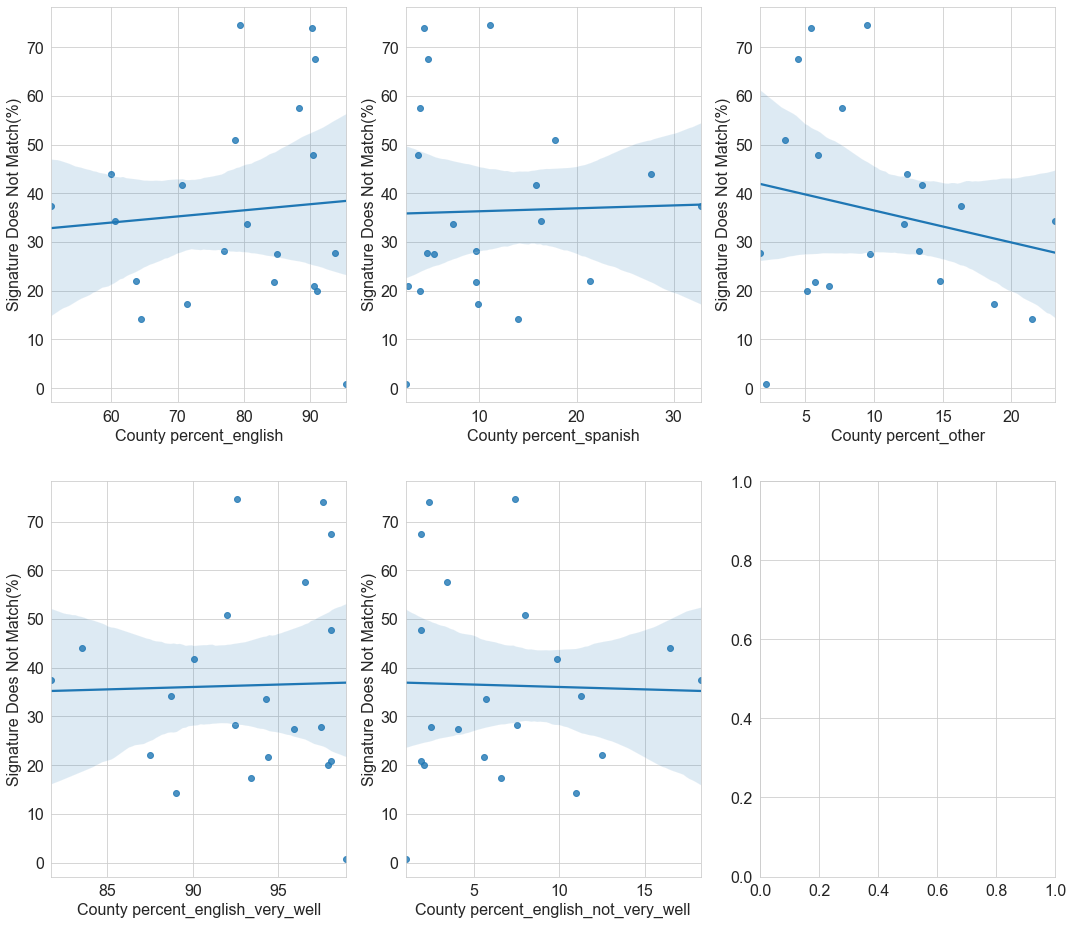

In [231]:
n_cols = 3

fig, axs = plt.subplots(math.ceil(len(language_columns)/n_cols),n_cols,figsize=(18,16))

for i in range(0,len(language_columns),n_cols):
    w = int(i / n_cols)
    for j, feature in enumerate(language_columns[i:i+n_cols]):
        sns.regplot(x=feature, y='Signature Does Not Match(%)', data=merged_df, ax = axs[w,j])

plt.show()

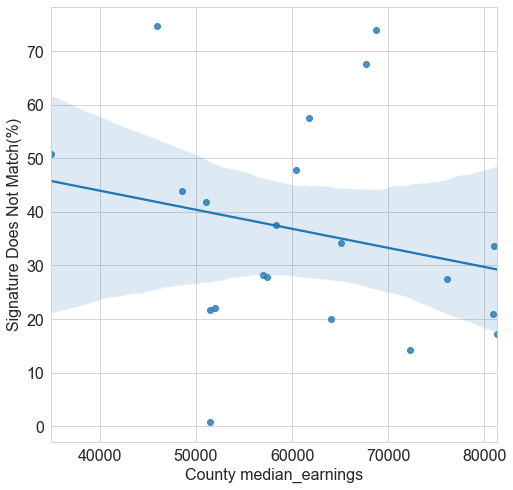

In [232]:
fig, ax = plt.subplots(figsize=(8,8))

sns.regplot(x='County median_earnings', y='Signature Does Not Match(%)', data=merged_df, ax = ax)

plt.show()

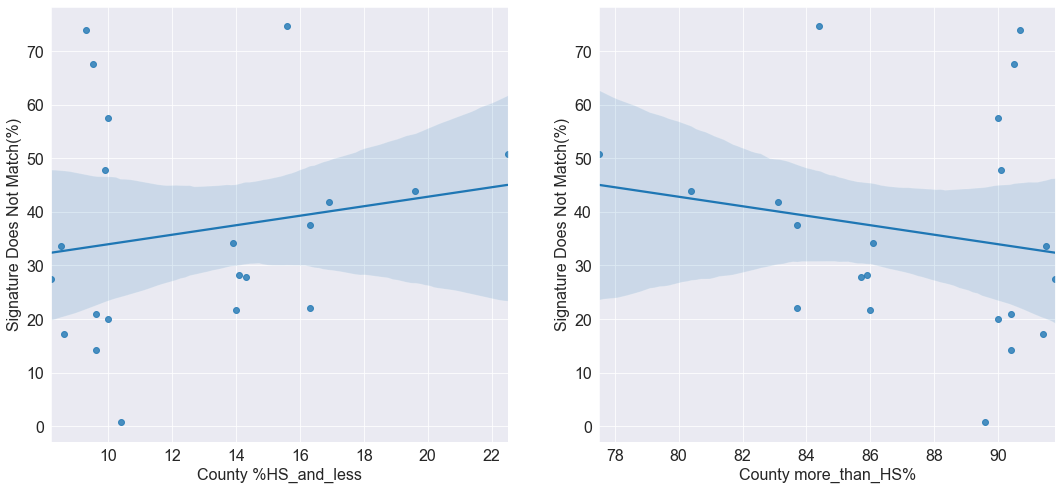

In [207]:
fig, axs = plt.subplots(1,2,figsize=(18,8))

for j, feature in enumerate(education_columns):
    sns.regplot(x=feature, y='Signature Does Not Match(%)', data=merged_df, ax = axs[j])

plt.show()

### Certificate Not Signed(%)

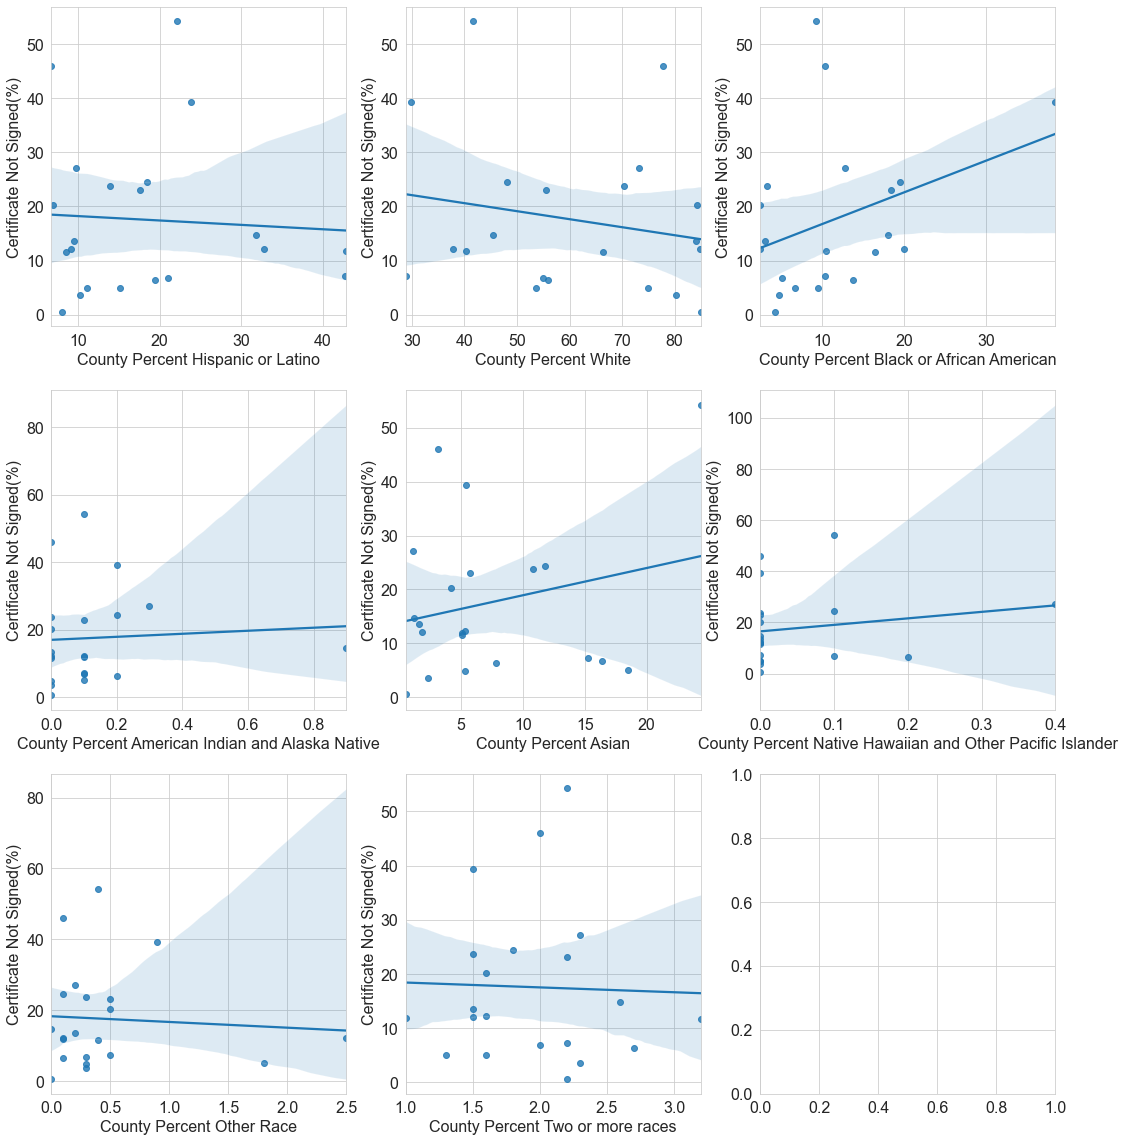

In [250]:
n_cols = 3

fig, axs = plt.subplots(math.ceil(len(race_columns)/n_cols),n_cols,figsize=(18,20))

for i in range(0,len(race_columns),n_cols):
    w = int(i / n_cols)
    for j, feature in enumerate(race_columns[i:i+n_cols]):
        sns.regplot(x=feature, y='Certificate Not Signed(%)', data=merged_df, ax = axs[w,j])

plt.show()

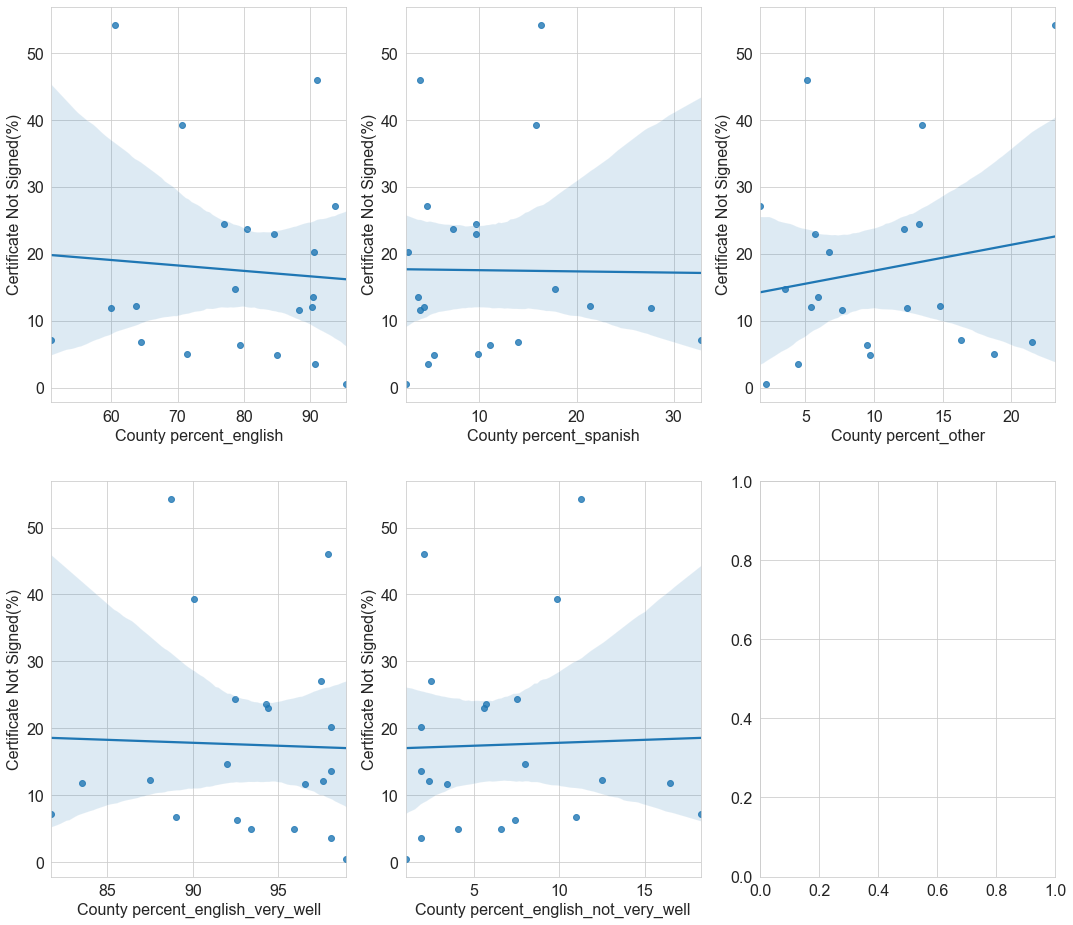

In [249]:
n_cols = 3

fig, axs = plt.subplots(math.ceil(len(language_columns)/n_cols),n_cols,figsize=(18,16))

for i in range(0,len(language_columns),n_cols):
    w = int(i / n_cols)
    for j, feature in enumerate(language_columns[i:i+n_cols]):
        sns.regplot(x=feature, y='Certificate Not Signed(%)', data=merged_df, ax = axs[w,j])

plt.show()

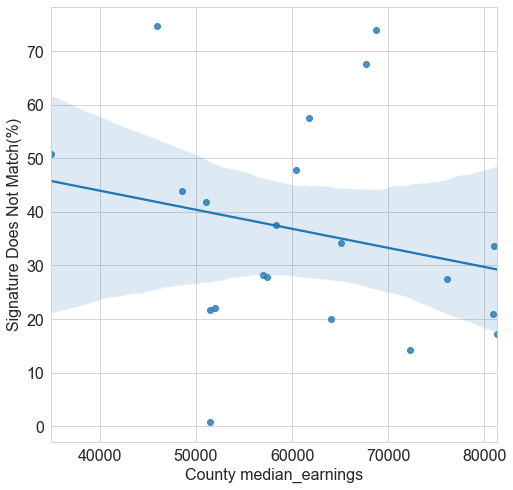

In [232]:
fig, ax = plt.subplots(figsize=(8,8))

sns.regplot(x='County median_earnings', y='Certificate Not Signed(%)', data=merged_df, ax = ax)

plt.show()

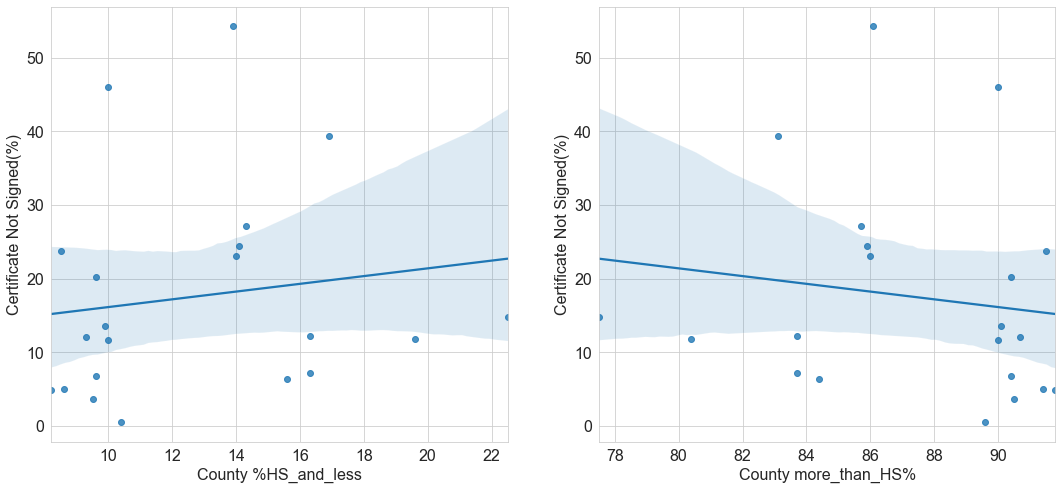

In [248]:
fig, axs = plt.subplots(1,2,figsize=(18,8))

for j, feature in enumerate(education_columns):
    sns.regplot(x=feature, y='Certificate Not Signed(%)', data=merged_df, ax = axs[j])

plt.show()

### Certificate Missing(%)

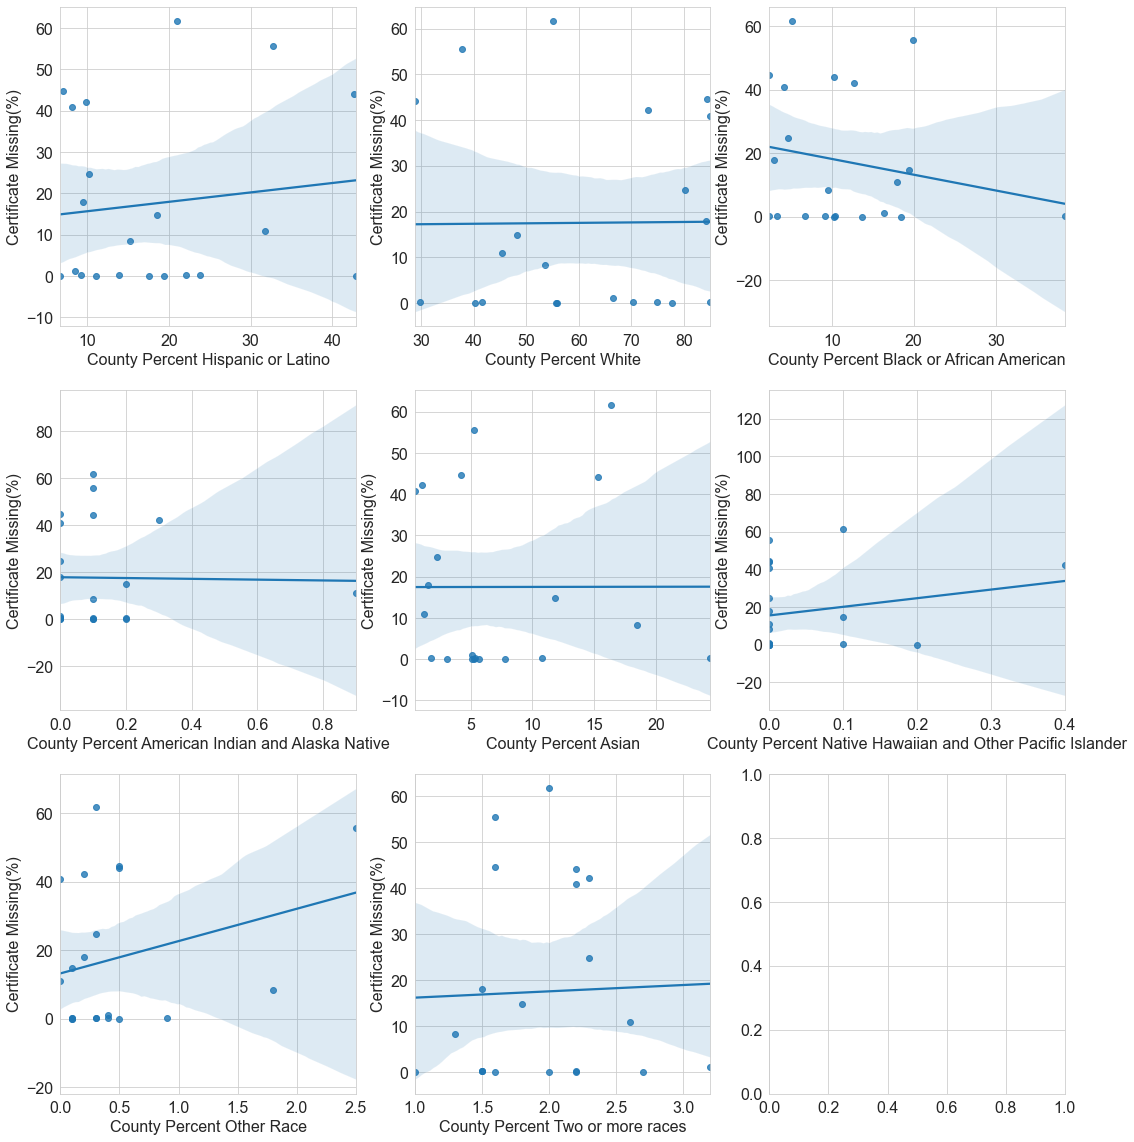

In [251]:
n_cols = 3

fig, axs = plt.subplots(math.ceil(len(race_columns)/n_cols),n_cols,figsize=(18,20))

for i in range(0,len(race_columns),n_cols):
    w = int(i / n_cols)
    for j, feature in enumerate(race_columns[i:i+n_cols]):
        sns.regplot(x=feature, y='Certificate Missing(%)', data=merged_df, ax = axs[w,j])

plt.show()

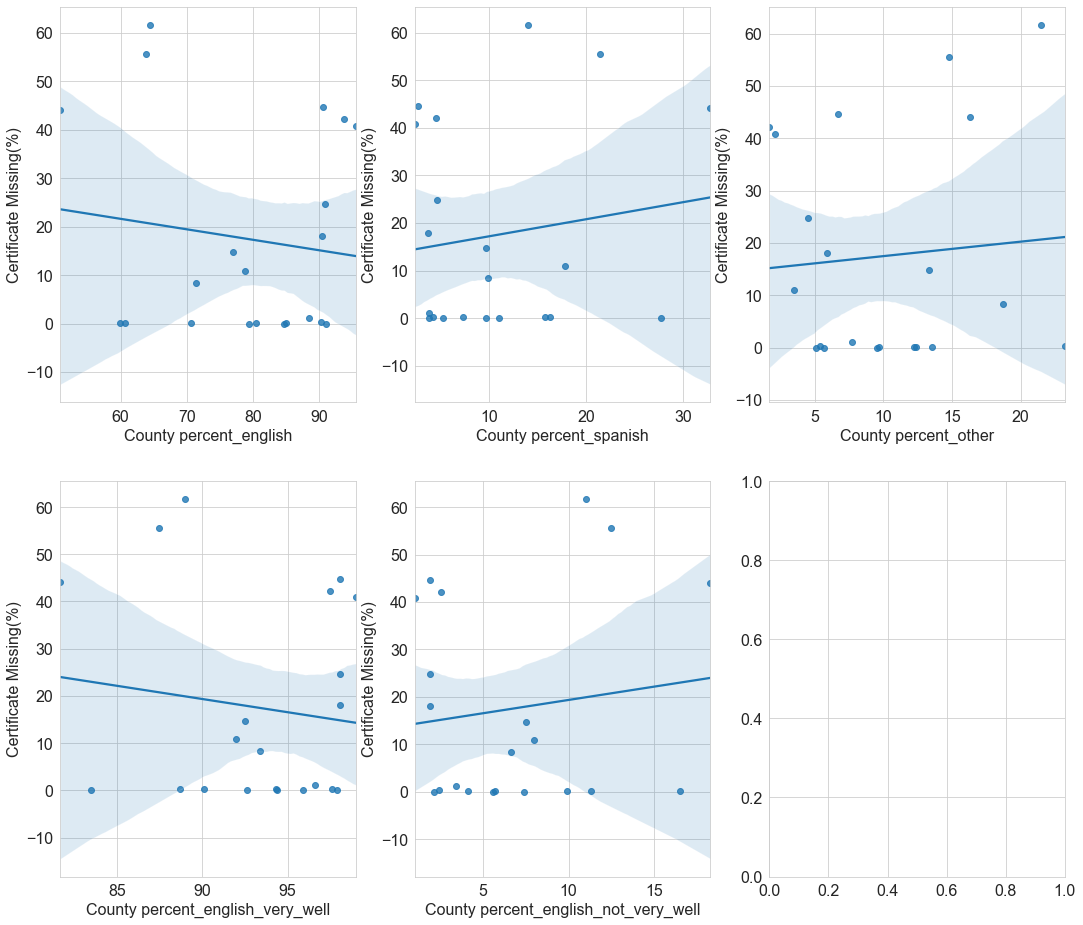

In [252]:
n_cols = 3

fig, axs = plt.subplots(math.ceil(len(language_columns)/n_cols),n_cols,figsize=(18,16))

for i in range(0,len(language_columns),n_cols):
    w = int(i / n_cols)
    for j, feature in enumerate(language_columns[i:i+n_cols]):
        sns.regplot(x=feature, y='Certificate Missing(%)', data=merged_df, ax = axs[w,j])

plt.show()

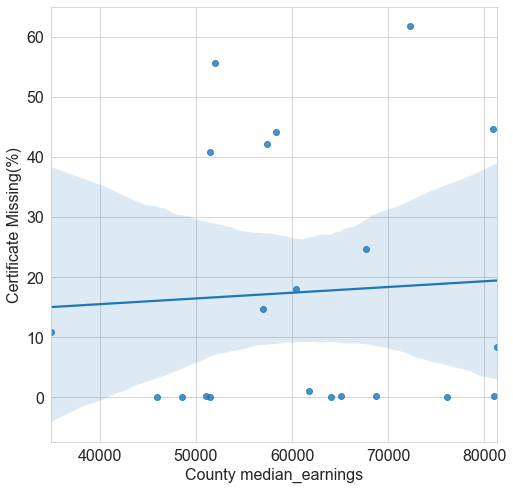

In [253]:
fig, ax = plt.subplots(figsize=(8,8))

sns.regplot(x='County median_earnings', y='Certificate Missing(%)', data=merged_df, ax = ax)

plt.show()

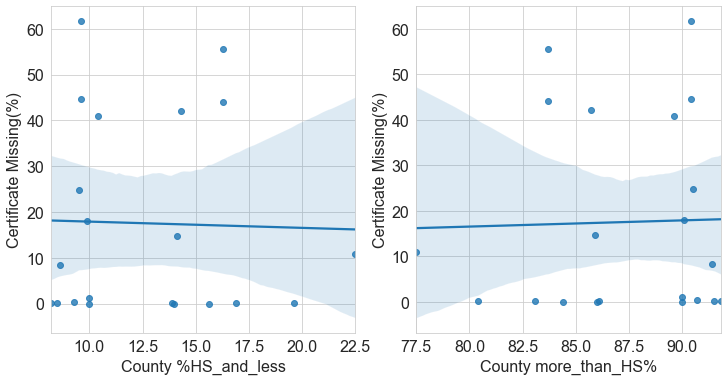

In [260]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

for j, feature in enumerate(education_columns):
    sns.regplot(x=feature, y='Certificate Missing(%)', data=merged_df, ax = axs[j])

plt.show()

### Ballot Received After Deadline(%)

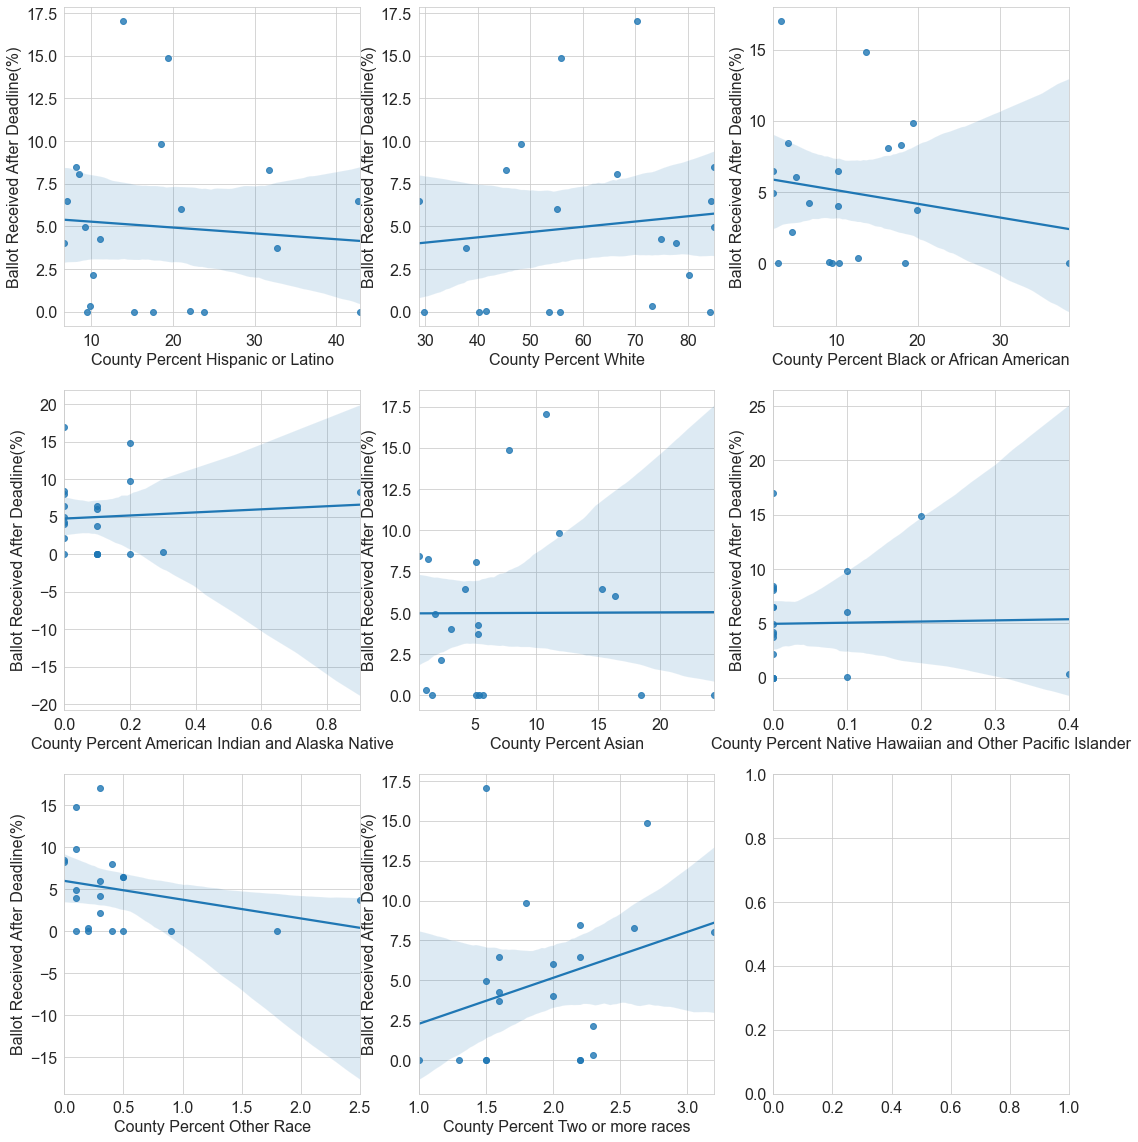

In [258]:
n_cols = 3

fig, axs = plt.subplots(math.ceil(len(race_columns)/n_cols),n_cols,figsize=(18,20))

for i in range(0,len(race_columns),n_cols):
    w = int(i / n_cols)
    for j, feature in enumerate(race_columns[i:i+n_cols]):
        sns.regplot(x=feature, y='Ballot Received After Deadline(%)', data=merged_df, ax = axs[w,j])

plt.show()

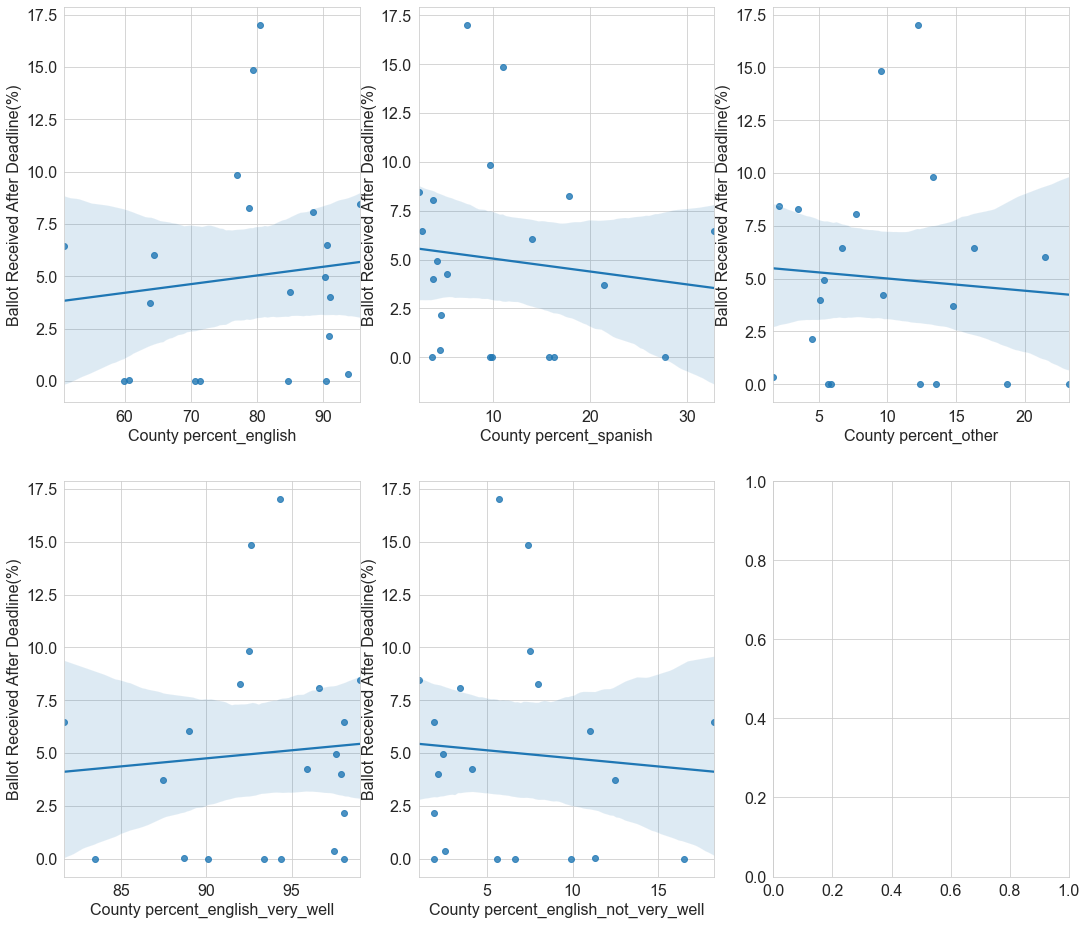

In [257]:
n_cols = 3

fig, axs = plt.subplots(math.ceil(len(language_columns)/n_cols),n_cols,figsize=(18,16))

for i in range(0,len(language_columns),n_cols):
    w = int(i / n_cols)
    for j, feature in enumerate(language_columns[i:i+n_cols]):
        sns.regplot(x=feature, y='Ballot Received After Deadline(%)', data=merged_df, ax = axs[w,j])

plt.show()

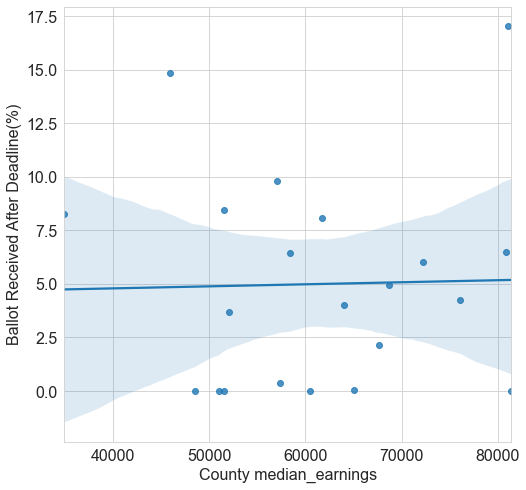

In [256]:
fig, ax = plt.subplots(figsize=(8,8))

sns.regplot(x='County median_earnings', y='Ballot Received After Deadline(%)', data=merged_df, ax = ax)

plt.show()

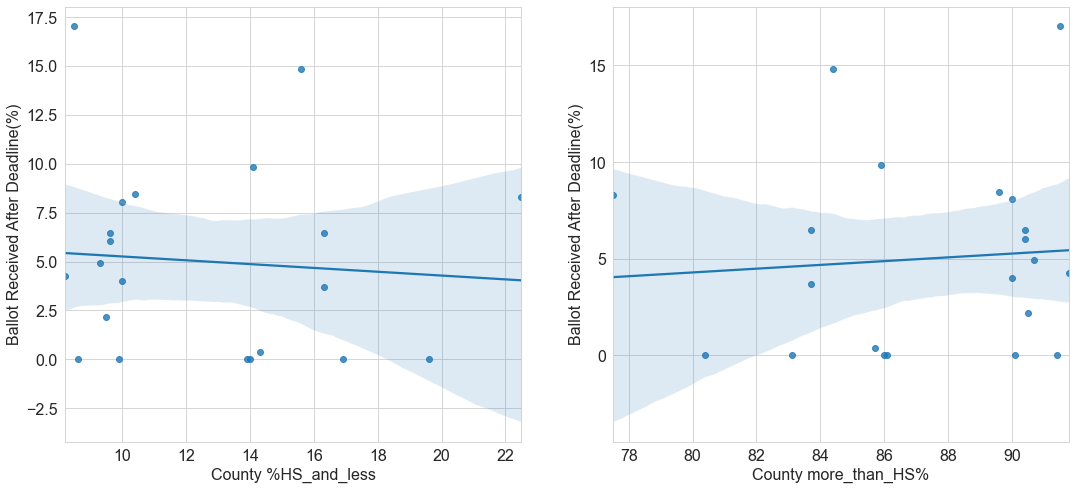

In [255]:
fig, axs = plt.subplots(1,2,figsize=(18,8))

for j, feature in enumerate(education_columns):
    sns.regplot(x=feature, y='Ballot Received After Deadline(%)', data=merged_df, ax = axs[j])

plt.show()